In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
cwd = os.getcwd()
df = pd.read_csv(cwd + "/customer_booking.csv",  encoding="ISO-8859-1")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [5]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [6]:
df.duplicated().value_counts()

False    49281
True       719
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


## Univariate analysis


In [9]:
df.num_passengers.value_counts()

1    30879
2    12669
3     2882
4     1767
5      544
6      281
7      107
8       88
9       64
Name: num_passengers, dtype: int64

In [10]:
df.sales_channel.value_counts()

Internet    43917
Mobile       5364
Name: sales_channel, dtype: int64

Most bookings are made by internet rather than mobile

In [11]:
df.trip_type.value_counts()/df.shape[0]*100

RoundTrip     98.981352
OneWay         0.783263
CircleTrip     0.235385
Name: trip_type, dtype: float64

Most passengers are using round trip option while booking

In [12]:
df.purchase_lead.value_counts()

1      681
2      666
6      649
7      636
5      611
      ... 
463      1
460      1
453      1
584      1
867      1
Name: purchase_lead, Length: 470, dtype: int64

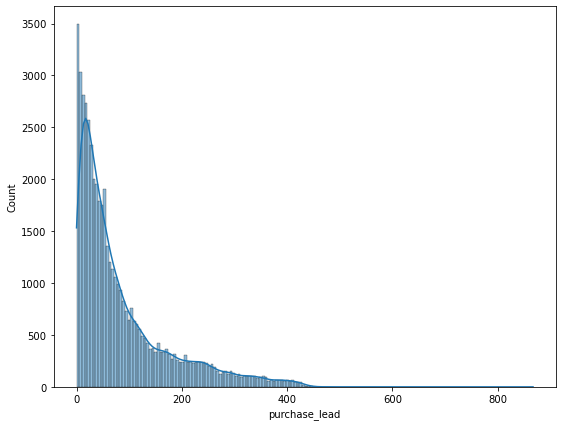

In [16]:
plt.figure(figsize=[9,7])
sns.histplot(data=df,x=df.purchase_lead,kde=True)
plt.show()

Here we can see that only some bookings are made in advance more than 2 years before of the travelling date. Most oftenly the passengers will book the tickets before 1.5 years of the travelling date .so we can consider the them as the outliers which are more than 1.5 years.

In [17]:
df[df.purchase_lead>550]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
835,3,Internet,RoundTrip,641,46,6,Sun,AKLKUL,Malaysia,1,0,1,8.83,1
2058,2,Internet,RoundTrip,577,26,9,Mon,AKLKUL,New Zealand,0,0,0,8.83,0
2770,1,Internet,RoundTrip,557,22,19,Sat,BLRMEL,India,1,0,1,8.83,0
6148,1,Internet,RoundTrip,614,19,11,Wed,COKMEL,Australia,0,0,0,8.83,0
8770,2,Internet,RoundTrip,584,45,11,Sun,DELSYD,India,1,1,0,8.58,0
20832,2,Internet,RoundTrip,573,20,23,Sat,MELTRZ,Australia,1,0,0,8.83,0
20919,2,Internet,RoundTrip,564,17,16,Sun,MELURT,Australia,1,0,1,8.83,0
24119,1,Internet,RoundTrip,704,23,8,Tue,PNHSYD,Australia,0,0,0,8.58,0
33240,2,Internet,RoundTrip,553,4,13,Wed,KBVTPE,Taiwan,1,0,0,4.67,0
38356,2,Internet,RoundTrip,633,5,10,Sat,HKTOOL,Australia,0,0,1,8.83,0


In [18]:
df=df[df.purchase_lead<550]

In [19]:
df.length_of_stay.value_counts()

6      7608
5      7149
4      5567
3      2798
17     1822
       ... 
242       1
392       1
431       1
513       1
329       1
Name: length_of_stay, Length: 335, dtype: int64

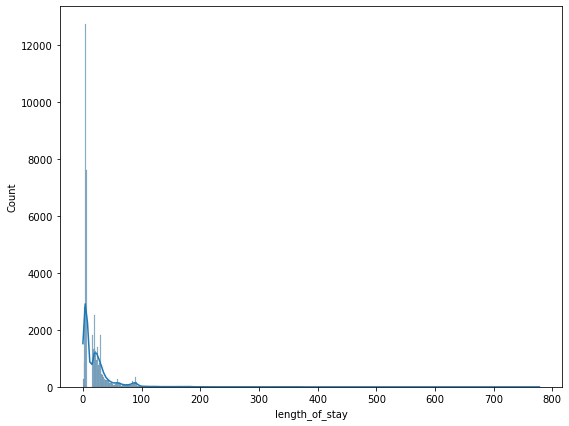

In [20]:
plt.figure(figsize=[9,7])
sns.histplot(data=df,x=df.length_of_stay,kde=True)
plt.show()

In [21]:
df.flight_hour.value_counts()

8     3124
12    3114
9     3096
7     3079
11    3069
10    3049
13    3045
6     3008
5     2817
4     2786
14    2783
3     2616
2     2596
15    2200
1     2071
16    1535
0     1501
23     974
17     848
22     573
18     429
21     386
19     293
20     275
Name: flight_hour, dtype: int64

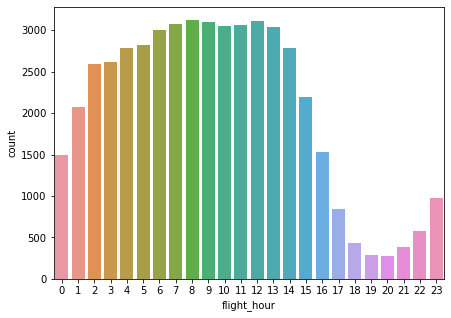

In [22]:
plt.figure(figsize=[7,5])
sns.countplot(data=df,x=df.flight_hour)
plt.show()

Here flight hour travel can't be 0 hour which is a outlier

In [23]:
df.flight_hour.mode()

0    8
Name: flight_hour, dtype: int64

In [24]:
# it's discrete column so filling 0 value with mode
df.flight_hour.replace(0,8,inplace=True)

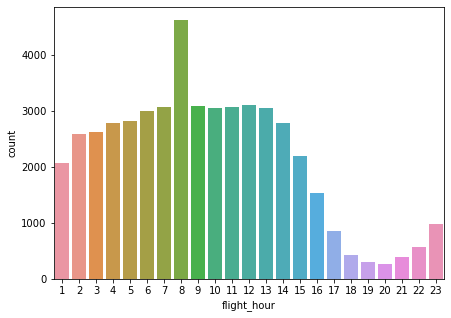

In [26]:
plt.figure(figsize=[7,5])
sns.countplot(data=df,x=df.flight_hour)
plt.show()

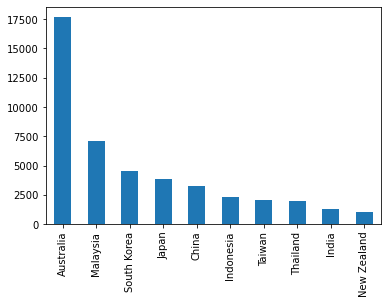

In [27]:
df.booking_origin.value_counts()[:10].plot(kind='bar')
plt.show()

In [28]:
df.flight_day

0        Sat
1        Sat
2        Wed
3        Sat
4        Wed
        ... 
49995    Sat
49996    Sun
49997    Sat
49998    Mon
49999    Thu
Name: flight_day, Length: 49267, dtype: object

### Replacing the weekdays name into numerical

In [29]:
df.flight_day.replace({'Mon':1,'Tue':2,'Wed':3,'Thu':4,'Fri':5,'Sat':6,'Sun':7},inplace=True)

In [30]:
df.flight_day.value_counts()

1    7986
3    7560
2    7557
4    7322
5    6683
7    6439
6    5720
Name: flight_day, dtype: int64

Passengers are mostly preferring to travel on start of the week giving least importance on the weekend

In [31]:
df.wants_extra_baggage.value_counts()

1    32925
0    16342
Name: wants_extra_baggage, dtype: int64

In [32]:
df.wants_in_flight_meals.value_counts()

0    28248
1    21019
Name: wants_in_flight_meals, dtype: int64

In [33]:
df.wants_preferred_seat.value_counts()

0    34699
1    14568
Name: wants_preferred_seat, dtype: int64

Passengers mostly prefer for extra baggage rather than inflight meals and preferred seat.

In [34]:
df.booking_complete.value_counts()/df.shape[0]*100

0    85.002131
1    14.997869
Name: booking_complete, dtype: float64

out of 50000 record we have only 14.99 % as complete booking

In [36]:
df.flight_duration.value_counts()

8.83    14331
8.58     6890
5.62     5464
6.62     4657
7.00     3313
7.57     2785
4.67     2697
6.42     1708
5.33     1506
4.75     1246
6.33     1178
8.67      787
5.52      664
5.07      501
4.72      486
8.15      299
5.00      237
7.42      221
4.83      145
5.13      116
9.50       36
Name: flight_duration, dtype: int64

In [37]:
df.drop(columns=['route'],inplace=True)

In [38]:
country=df.booking_origin

In [39]:
country=pd.get_dummies(country)

In [40]:
country

,(not set),Afghanistan,Algeria,Argentina,Australia,Austria,Bahrain,Bangladesh,Belarus,Belgium,...,Timor-Leste,Tonga,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Vanuatu,Vietnam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Dimensionality Reduction


In [41]:
from sklearn.decomposition import PCA
pca=PCA(n_components=14)
reduced_column=pca.fit_transform(country)
pca.explained_variance_ratio_.cumsum()

array([0.31634056, 0.46555323, 0.56891987, 0.65564222, 0.72277411,
       0.77673469, 0.82634816, 0.86114526, 0.8893819 , 0.91511743,
       0.92817723, 0.93835494, 0.94665236, 0.95397362])

In [42]:
df.sales_channel.replace({'Internet':0,'Mobile':1},inplace=True)

In [43]:
df.trip_type.value_counts()

RoundTrip     48765
OneWay          386
CircleTrip      116
Name: trip_type, dtype: int64

In [44]:
df.trip_type.replace({'OneWay':0,'RoundTrip':1,'CircleTrip':2},inplace=True)

In [45]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,1,262,19,7,6,New Zealand,1,0,0,5.52,0
1,1,0,1,112,20,3,6,New Zealand,0,0,0,5.52,0
2,2,0,1,243,22,17,3,India,1,1,0,5.52,0
3,1,0,1,96,31,4,6,New Zealand,0,0,1,5.52,0
4,2,0,1,68,22,15,3,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,1,27,6,9,6,Australia,1,0,1,5.62,0
49996,1,0,1,111,6,4,7,Australia,0,0,0,5.62,0
49997,1,0,1,24,6,22,6,Australia,0,0,1,5.62,0
49998,1,0,1,15,6,11,1,Australia,1,0,1,5.62,0


In [46]:
for i in range(14):
    df['booking_origin_'+ str(i)]=reduced_column[:,i]

In [47]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,...,booking_origin_4,booking_origin_5,booking_origin_6,booking_origin_7,booking_origin_8,booking_origin_9,booking_origin_10,booking_origin_11,booking_origin_12,booking_origin_13
0,2,0,1,262,19,7,6,New Zealand,1,0,...,0.157841,-0.075812,0.017554,0.365256,0.662160,-0.635367,-0.121522,-0.033204,-0.030999,-0.003230
1,1,0,1,112,20,3,6,New Zealand,0,0,...,0.157841,-0.075812,0.017554,0.365256,0.662160,-0.635367,-0.121522,-0.033204,-0.030999,-0.003230
2,2,0,1,243,22,17,3,India,1,1,...,0.178862,-0.091675,0.022081,0.817367,-0.538220,-0.041525,-0.088649,-0.025471,-0.024380,-0.002569
3,1,0,1,96,31,4,6,New Zealand,0,0,...,0.157841,-0.075812,0.017554,0.365256,0.662160,-0.635367,-0.121522,-0.033204,-0.030999,-0.003230
4,2,0,1,68,22,15,3,India,1,0,...,0.178862,-0.091675,0.022081,0.817367,-0.538220,-0.041525,-0.088649,-0.025471,-0.024380,-0.002569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,1,27,6,9,6,Australia,1,0,...,-0.017596,0.005542,-0.001071,-0.007954,-0.003518,-0.000523,-0.003744,-0.001241,-0.001290,-0.000141
49996,1,0,1,111,6,4,7,Australia,0,0,...,-0.017596,0.005542,-0.001071,-0.007954,-0.003518,-0.000523,-0.003744,-0.001241,-0.001290,-0.000141
49997,1,0,1,24,6,22,6,Australia,0,0,...,-0.017596,0.005542,-0.001071,-0.007954,-0.003518,-0.000523,-0.003744,-0.001241,-0.001290,-0.000141
49998,1,0,1,15,6,11,1,Australia,1,0,...,-0.017596,0.005542,-0.001071,-0.007954,-0.003518,-0.000523,-0.003744,-0.001241,-0.001290,-0.000141


Handling Imbalance data

In [55]:
y=df.booking_complete

In [66]:
df.drop(columns=['booking_complete','booking_origin'],inplace=True)

In [59]:
df['target']=y

In [90]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,booking_origin_5,booking_origin_6,booking_origin_7,booking_origin_8,booking_origin_9,booking_origin_10,booking_origin_11,booking_origin_12,booking_origin_13,target
0,2,0,1,262,19,7,6,1,0,0,...,-0.075812,0.017554,0.365256,0.662160,-0.635367,-0.121522,-0.033204,-0.030999,-0.003230,0
1,1,0,1,112,20,3,6,0,0,0,...,-0.075812,0.017554,0.365256,0.662160,-0.635367,-0.121522,-0.033204,-0.030999,-0.003230,0
2,2,0,1,243,22,17,3,1,1,0,...,-0.091675,0.022081,0.817367,-0.538220,-0.041525,-0.088649,-0.025471,-0.024380,-0.002569,0
3,1,0,1,96,31,4,6,0,0,1,...,-0.075812,0.017554,0.365256,0.662160,-0.635367,-0.121522,-0.033204,-0.030999,-0.003230,0
4,2,0,1,68,22,15,3,1,0,1,...,-0.091675,0.022081,0.817367,-0.538220,-0.041525,-0.088649,-0.025471,-0.024380,-0.002569,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,1,27,6,9,6,1,0,1,...,0.005542,-0.001071,-0.007954,-0.003518,-0.000523,-0.003744,-0.001241,-0.001290,-0.000141,0
49996,1,0,1,111,6,4,7,0,0,0,...,0.005542,-0.001071,-0.007954,-0.003518,-0.000523,-0.003744,-0.001241,-0.001290,-0.000141,0
49997,1,0,1,24,6,22,6,0,0,1,...,0.005542,-0.001071,-0.007954,-0.003518,-0.000523,-0.003744,-0.001241,-0.001290,-0.000141,0
49998,1,0,1,15,6,11,1,1,0,1,...,0.005542,-0.001071,-0.007954,-0.003518,-0.000523,-0.003744,-0.001241,-0.001290,-0.000141,0


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
from collections import Counter
counter = Counter(ytrain)
print('Before',counter)

smt = SMOTE()

xtrain_sm,ytrain_sm = smt.fit_resample(xtrain,ytrain)

counter = Counter(ytrain_sm)
print('After',counter)

Before Counter({0: 29293, 1: 5193})
After Counter({0: 29293, 1: 29293})


In [72]:
xtrain_sm.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'booking_origin_0', 'booking_origin_1', 'booking_origin_2',
       'booking_origin_3', 'booking_origin_4', 'booking_origin_5',
       'booking_origin_6', 'booking_origin_7', 'booking_origin_8',
       'booking_origin_9', 'booking_origin_10', 'booking_origin_11',
       'booking_origin_12', 'booking_origin_13'],
      dtype='object')

In [73]:
xtrain_sm

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,booking_origin_4,booking_origin_5,booking_origin_6,booking_origin_7,booking_origin_8,booking_origin_9,booking_origin_10,booking_origin_11,booking_origin_12,booking_origin_13
0,1,0,1,23,23,15,3,1,0,0,...,-0.472312,0.078617,-0.013228,-0.069188,-0.027229,-0.003890,-0.023327,-0.007468,-0.007594,-0.000824
1,1,0,1,53,26,15,7,1,1,0,...,0.383893,-0.569803,-0.649036,-0.206208,-0.065083,-0.008746,-0.042521,-0.013171,-0.013134,-0.001411
2,1,1,1,15,56,14,2,1,0,0,...,-0.017596,0.005542,-0.001071,-0.007954,-0.003518,-0.000523,-0.003744,-0.001241,-0.001290,-0.000141
3,2,0,1,40,17,12,3,1,1,1,...,-0.017596,0.005542,-0.001071,-0.007954,-0.003518,-0.000523,-0.003744,-0.001241,-0.001290,-0.000141
4,1,0,1,46,44,20,4,1,0,1,...,0.098636,-0.040246,0.008576,0.095493,0.053442,0.008822,0.135955,0.060223,0.079813,0.010684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58581,1,0,1,86,21,13,1,1,0,1,...,-0.017596,0.005542,-0.001071,-0.007954,-0.003518,-0.000523,-0.003744,-0.001241,-0.001290,-0.000141
58582,1,0,1,46,4,1,5,1,0,0,...,-0.047661,0.013970,-0.002643,-0.018379,-0.007922,-0.001167,-0.007987,-0.002623,-0.002710,-0.000296
58583,1,0,1,26,3,9,3,1,0,0,...,0.108302,-0.163648,0.303587,-0.103696,-0.033601,-0.004569,-0.023579,-0.007397,-0.007436,-0.000802
58584,1,0,1,100,29,16,4,1,0,1,...,0.042213,-0.017986,0.003883,0.044990,0.025557,0.004237,0.066344,0.029269,0.038666,0.005082


In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaled=StandardScaler()

In [81]:
xtrain_sm[['purchase_lead','length_of_stay','flight_hour','flight_duration']]=scaled.fit_transform(xtrain_sm[['purchase_lead','length_of_stay','flight_hour','flight_duration']])

In [82]:
xtrain_sm

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,booking_origin_4,booking_origin_5,booking_origin_6,booking_origin_7,booking_origin_8,booking_origin_9,booking_origin_10,booking_origin_11,booking_origin_12,booking_origin_13
0,1,0,1,-0.662893,0.053001,1.163644,3,1,0,0,...,-0.472312,0.078617,-0.013228,-0.069188,-0.027229,-0.003890,-0.023327,-0.007468,-0.007594,-0.000824
1,1,0,1,-0.328953,0.144673,1.163644,7,1,1,0,...,0.383893,-0.569803,-0.649036,-0.206208,-0.065083,-0.008746,-0.042521,-0.013171,-0.013134,-0.001411
2,1,1,1,-0.751943,1.061397,0.964358,2,1,0,0,...,-0.017596,0.005542,-0.001071,-0.007954,-0.003518,-0.000523,-0.003744,-0.001241,-0.001290,-0.000141
3,2,0,1,-0.473660,-0.130344,0.565785,3,1,1,1,...,-0.017596,0.005542,-0.001071,-0.007954,-0.003518,-0.000523,-0.003744,-0.001241,-0.001290,-0.000141
4,1,0,1,-0.406872,0.694708,2.160076,4,1,0,1,...,0.098636,-0.040246,0.008576,0.095493,0.053442,0.008822,0.135955,0.060223,0.079813,0.010684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58581,1,0,1,0.038381,-0.008114,0.765071,1,1,0,1,...,-0.017596,0.005542,-0.001071,-0.007954,-0.003518,-0.000523,-0.003744,-0.001241,-0.001290,-0.000141
58582,1,0,1,-0.406872,-0.527591,-1.626364,5,1,0,0,...,-0.047661,0.013970,-0.002643,-0.018379,-0.007922,-0.001167,-0.007987,-0.002623,-0.002710,-0.000296
58583,1,0,1,-0.629499,-0.558149,-0.032074,3,1,0,0,...,0.108302,-0.163648,0.303587,-0.103696,-0.033601,-0.004569,-0.023579,-0.007397,-0.007436,-0.000802
58584,1,0,1,0.194219,0.236345,1.362930,4,1,0,1,...,0.042213,-0.017986,0.003883,0.044990,0.025557,0.004237,0.066344,0.029269,0.038666,0.005082


In [83]:
xtest[['purchase_lead','length_of_stay','flight_hour','flight_duration']]=scaled.fit_transform(xtest[['purchase_lead','length_of_stay','flight_hour','flight_duration']])

In [84]:
from sklearn.metrics import classification_report,accuracy_score
import scikitplot

## Random Forest

              precision    recall  f1-score   support

           0       0.87      0.79      0.83     12585
           1       0.22      0.33      0.27      2196

    accuracy                           0.72     14781
   macro avg       0.55      0.56      0.55     14781
weighted avg       0.78      0.72      0.75     14781



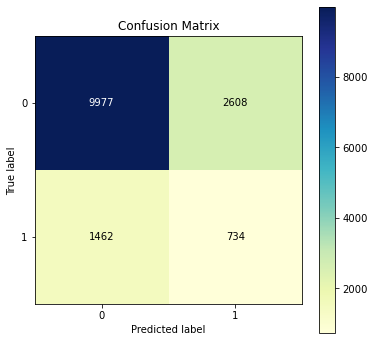

In [86]:
from sklearn.ensemble import RandomForestClassifier
Rf_model=RandomForestClassifier(n_estimators=100)
Rf_model.fit(xtrain_sm,ytrain_sm)
Rf_predict=Rf_model.predict(xtest)
accuracy_score(ytest,Rf_predict)
Rf_Report=classification_report(ytest,Rf_predict)
print(Rf_Report)
scikitplot.metrics.plot_confusion_matrix(ytest, Rf_predict, figsize=(6,6), cmap= 'YlGnBu');

In [93]:
order_index=Rf_model.feature_importances_.argsort()

<BarContainer object of 25 artists>

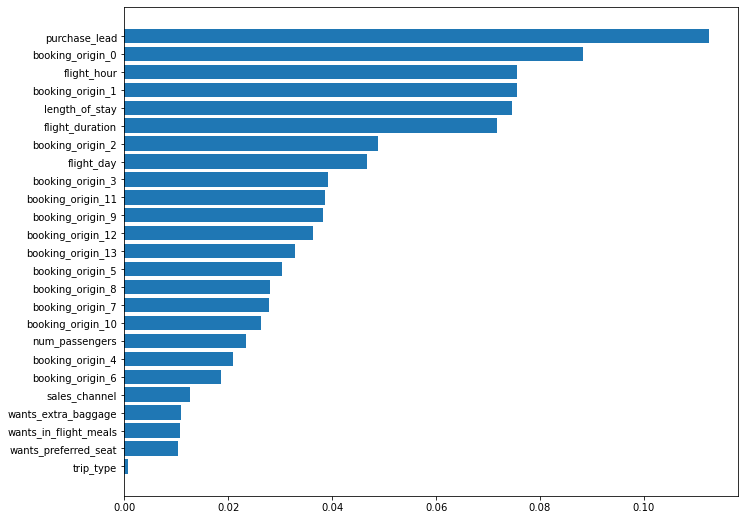

In [99]:
plt.figure(figsize=[11,9])
plt.barh(df.iloc[:,:-1].columns[order_index],Rf_model.feature_importances_[order_index])